In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\k\reviewsff2.csv")
data.head()

REVIEW  RATE  THUMBS_UP_COUNT
0  Big number game,not at all reasonable prices a...     1               80
1  Cheating through cancelation charges , while g...     1                1
2  Why does big basket bring about such an update...     1               48
3  Really irritating app.. Daily receiving msgs a...     1               11
4  Everytime i proceed to checkout, card payment ...     1                8

In [3]:
data.shape

(8400, 3)

In [4]:
data.drop(["THUMBS_UP_COUNT"], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REVIEW  8400 non-null   object
 1   RATE    8400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.4+ KB


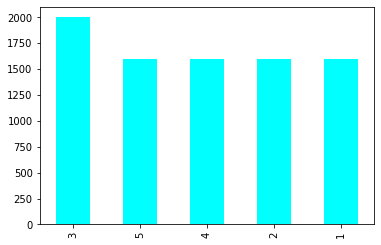

In [6]:
data['RATE'].value_counts().plot.bar(color = 'cyan')

The reviews are intentionally extraced with the imbalance to add the neutrality associated with the reviews rated 3 and prevent the dominance of the best and worst reviews for the analysis.

In [7]:
import re
import nltk

# downloading the list of stopword
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 8400):
  
  # getting rid of unwanted characters
  review = re.sub('[^a-zA-Z]', ' ', data['REVIEW'][i])

  #converting all the letters of the review into lowercase
  review = review.lower()

  # splitting every words from the sentences
  review = review.split()

  # applying stemming
  ps = PorterStemmer()

  # iterating through each words and checking if they are stopwords or not
  # if they are stopwords we will not consider them furthermore
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining the review again
  review = ' '.join(review)
  
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# looking at the cleaned text

print(corpus)

['big number game reason price worst part discount offer credit card fake pay show cant proce right without discount realli work good pleas dont fall trap suggest u better order nearbi store veggi hand pack item tag doubl price offer discount transpar worst experi', 'cheat cancel charg go payment time automat order place payment option cancel payment rs nonsens pay huge amount celebr cheat custom', 'big basket bring updat wherein slot show full previous slot avail recent updat slot full frustrat thing', 'realli irrit app daili receiv msg mail app login app show slot full tri later realli disgust app experienc issu sinc may month yet resolv', 'everytim proceed checkout card payment fail cart start show zero product select item final lead error irrit', 'disgust trick use sinc pay membership slot pm non member account usual hr slot option mid day time day two day later despit membership slot said chang pm even qualiti fruit veggi issu time got complet rotten fruit half rotten veggi thrice

In [9]:
from pandas import DataFrame

df = DataFrame(corpus, columns=['Rev'])
df.shape

(8400, 1)

In [10]:
rate = data["RATE"]
df = df.join(rate)

In [11]:
df.head()

Rev  RATE
0  big number game reason price worst part discou...     1
1  cheat cancel charg go payment time automat ord...     1
2  big basket bring updat wherein slot show full ...     1
3  realli irrit app daili receiv msg mail app log...     1
4  everytim proceed checkout card payment fail ca...     1

In [12]:
from collections import Counter
import string

df['temp_list'] = df['Rev'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [15]:
import plotly.express as px

fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [47]:
Positive_sent = df[df['RATE'] > 3]
Negative_sent = df[df['RATE'] < 3]
Neutral_sent = df[df['RATE'] == 3]

In [48]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [49]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [50]:
#MosT common negative words

top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [51]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [52]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [53]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

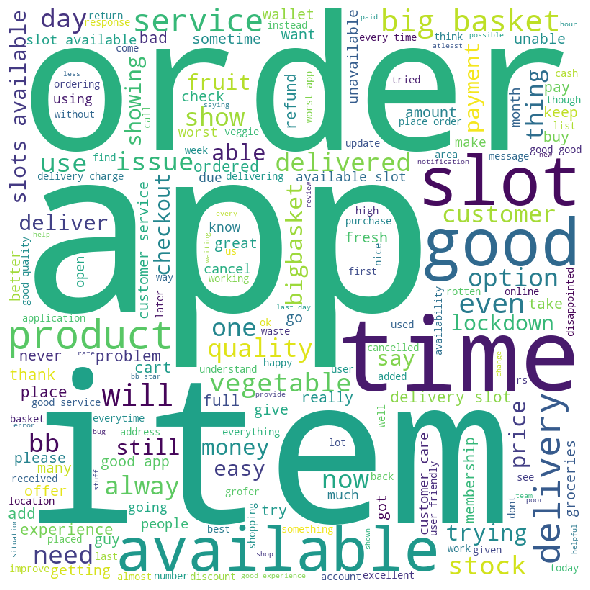

In [41]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads file
df1 = pd.read_csv(r"C:\Users\k\reviewsff2.csv") 

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df1.REVIEW: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

wordcloud.to_file("WCbigbasket.png")

In [54]:
# creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer

# creating the count vectorizer model
cv = CountVectorizer()

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

In [55]:
print(x.shape)

(8400, 5030)


In [57]:
# reducing the number of features

# creating the count vectorizer model with max_features
cv = CountVectorizer(max_features = 4000)

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

# checking the shape
print(x.shape)

# maing the dependent variable column
y = data.iloc[:, 1].values
print(y.shape)

(8400, 4000)
(8400,)


In [58]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6300, 4000)
(6300,)
(2100, 4000)
(2100,)


In [59]:
# min max scaling

from sklearn.preprocessing import MinMaxScaler

# creating a min max scaler
mm = MinMaxScaler()

# feeding the independent variables into the model
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [60]:
# Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# creating the model
model = GaussianNB()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.5680952380952381
Testing Accuracy : 0.35904761904761906
[[106  85  83  39  80]
 [ 26 129  70  59 128]
 [ 29  51 146  67 196]
 [ 19  13  36  74 294]
 [ 10  11  27  23 299]]


very poor model

In [61]:
# applying random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = RandomForestClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9396825396825397
Testing Accuracy : 0.5966666666666667
[[253  68  50   8  14]
 [ 72 244  65  14  17]
 [ 49  48 300  45  47]
 [ 18  19  72 160 167]
 [  7   8  27  32 296]]


Better but lets check if it's the best we can get

In [62]:
# applying decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = DecisionTreeClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9396825396825397
Testing Accuracy : 0.5395238095238095
[[201  73  70  20  29]
 [ 58 234  74  25  21]
 [ 50  49 294  52  44]
 [ 18  22  80 156 160]
 [ 13  13  36  60 248]]


In [63]:
# applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# creating the model
model = LogisticRegression()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.7723809523809524
Testing Accuracy : 0.5495238095238095
[[234  64  75   9  11]
 [ 68 210 109  16   9]
 [ 42  66 281  76  24]
 [  6  22 100 179 129]
 [  3   8  29  80 250]]


C:\Users\k\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [64]:
#using SV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# creating the model
model = SVC()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.7953968253968254
Testing Accuracy : 0.5433333333333333
[[274  41  69   2   7]
 [104 192  93  11  12]
 [ 83  35 294  41  36]
 [ 27  20 104 101 184]
 [ 28   2  36  24 280]]


In [65]:
# applying MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = MLPClassifier()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\k\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Training Accuracy : 0.9346031746031747
Testing Accuracy : 0.5580952380952381
[[230  61  68  16  18]
 [ 66 236  64  24  22]
 [ 54  52 296  46  41]
 [ 20  20  92 151 153]
 [  9  14  24  64 259]]


Looks like Random Forest is the BEST.